In [40]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from dataprep.eda import create_report
from pycaret.regression import *
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_pickle('data/final_without_NaNs_gender_age.pkl')
df.head()

,key,speed,Pelvis_acc_0mean,Pelvis_acc_0std,Pelvis_acc_1mean,Pelvis_acc_1std,Pelvis_acc_2mean,Pelvis_acc_2std,Pelvis_angular_acc_0mean,Pelvis_angular_acc_0std,Pelvis_angular_acc_1mean,Pelvis_angular_acc_1std,Pelvis_angular_acc_2mean,Pelvis_angular_acc_2std,Pelvis_vel_0mean,Pelvis_vel_0std,Pelvis_vel_1mean,Pelvis_vel_1std,Pelvis_vel_2mean,Pelvis_vel_2std,Pelvis_angular_vel_0mean,Pelvis_angular_vel_0std,Pelvis_angular_vel_1mean,Pelvis_angular_vel_1std,Pelvis_angular_vel_2mean,Pelvis_angular_vel_2std,Pelvis_ori_0mean,Pelvis_ori_0std,Pelvis_ori_1mean,Pelvis_ori_1std,Pelvis_ori_2mean,Pelvis_ori_2std,Pelvis_ori_3mean,Pelvis_ori_3std,Pelvis_pos_0mean,Pelvis_pos_0std,Pelvis_pos_1mean,Pelvis_pos_1std,Pelvis_pos_2mean,Pelvis_pos_2std,L5_acc_0mean,L5_acc_0std,L5_acc_1mean,L5_acc_1std,L5_acc_2mean,L5_acc_2std,L5_angular_acc_0mean,L5_angular_acc_0std,L5_angular_acc_1mean,L5_angular_acc_1std,L5_angular_acc_2mean,L5_angular_acc_2std,L5_vel_0mean,L5_vel_0std,L5_vel_1mean,L5_vel_1std,L5_vel_2mean,L5_vel_2std,L5_angular_vel_0mean,L5_angular_vel_0std,L5_angular_vel_1mean,L5_angular_vel_1std,L5_angular_vel_2mean,L5_angular_vel_2std,L5_ori_0mean,L5_ori_0std,L5_ori_1mean,L5_ori_1std,L5_ori_2mean,L5_ori_2std,L5_ori_3mean,L5_ori_3std,L5_pos_0mean,L5_pos_0std,L5_pos_1mean,L5_pos_1std,L5_pos_2mean,L5_pos_2std,L3_acc_0mean,L3_acc_0std,L3_acc_1mean,L3_acc_1std,L3_acc_2mean,L3_acc_2std,L3_angular_acc_0mean,L3_angular_acc_0std,L3_angular_acc_1mean,L3_angular_acc_1std,L3_angular_acc_2mean,L3_angular_acc_2std,L3_vel_0mean,L3_vel_0std,L3_vel_1mean,L3_vel_1std,L3_vel_2mean,L3_vel_2std,L3_angular_vel_0mean,L3_angular_vel_0std,L3_angular_vel_1mean,L3_angular_vel_1std,L3_angular_vel_2mean,L3_angular_vel_2std,L3_ori_0mean,L3_ori_0std,L3_ori_1mean,L3_ori_1std,L3_ori_2mean,L3_ori_2std,L3_ori_3mean,L3_ori_3std,L3_pos_0mean,L3_pos_0std,L3_pos_1mean,L3_pos_1std,L3_pos_2mean,L3_pos_2std,T12_acc_0mean,T12_acc_0std,T12_acc_1mean,T12_acc_1std,T12_acc_2mean,T12_acc_2std,T12_angular_acc_0mean,T12_angular_acc_0std,T12_angular_acc_1mean,T12_angular_acc_1std,T12_angular_acc_2mean,T12_angular_acc_2std,T12_vel_0mean,T12_vel_0std,T12_vel_1mean,T12_vel_1std,T12_vel_2mean,T12_vel_2std,T12_angular_vel_0mean,T12_angular_vel_0std,T12_angular_vel_1mean,T12_angular_vel_1std,T12_angular_vel_2mean,T12_angular_vel_2std,T12_ori_0mean,T12_ori_0std,T12_ori_1mean,T12_ori_1std,T12_ori_2mean,T12_ori_2std,T12_ori_3mean,T12_ori_3std,T12_pos_0mean,T12_pos_0std,T12_pos_1mean,T12_pos_1std,T12_pos_2mean,T12_pos_2std,T8_acc_0mean,T8_acc_0std,T8_acc_1mean,T8_acc_1std,T8_acc_2mean,T8_acc_2std,T8_angular_acc_0mean,T8_angular_acc_0std,T8_angular_acc_1mean,T8_angular_acc_1std,T8_angular_acc_2mean,T8_angular_acc_2std,T8_vel_0mean,T8_vel_0std,T8_vel_1mean,T8_vel_1std,T8_vel_2mean,T8_vel_2std,T8_angular_vel_0mean,T8_angular_vel_0std,T8_angular_vel_1mean,T8_angular_vel_1std,T8_angular_vel_2mean,T8_angular_vel_2std,T8_ori_0mean,T8_ori_0std,T8_ori_1mean,T8_ori_1std,T8_ori_2mean,T8_ori_2std,T8_ori_3mean,T8_ori_3std,T8_pos_0mean,T8_pos_0std,T8_pos_1mean,T8_pos_1std,T8_pos_2mean,T8_pos_2std,Neck_acc_0mean,Neck_acc_0std,Neck_acc_1mean,Neck_acc_1std,Neck_acc_2mean,Neck_acc_2std,Neck_angular_acc_0mean,Neck_angular_acc_0std,Neck_angular_acc_1mean,Neck_angular_acc_1std,Neck_angular_acc_2mean,Neck_angular_acc_2std,Neck_vel_0mean,Neck_vel_0std,Neck_vel_1mean,Neck_vel_1std,Neck_vel_2mean,Neck_vel_2std,Neck_angular_vel_0mean,Neck_angular_vel_0std,Neck_angular_vel_1mean,Neck_angular_vel_1std,Neck_angular_vel_2mean,Neck_angular_vel_2std,Neck_ori_0mean,Neck_ori_0std,Neck_ori_1mean,Neck_ori_1std,Neck_ori_2mean,Neck_ori_2std,Neck_ori_3mean,Neck_ori_3std,Neck_pos_0mean,Neck_pos_0std,Neck_pos_1mean,Neck_pos_1std,Neck_pos_2mean,Neck_pos_2std,Head_acc_0mean,Head_acc_0std,Head_acc_1mean,Head_acc_1std,Head_acc_2mean,Head_acc_2std,Head_angular_acc_0mean,Head_angular_acc_0std,Head_angular_acc_1mean,Head_angular_acc_1std,Head_angular_acc_2mean,Head_angular_acc_2std,Head_vel_0mean,Head_vel_0std,Head_vel_1mean,Head_vel_1std,Head_vel_2mean,He

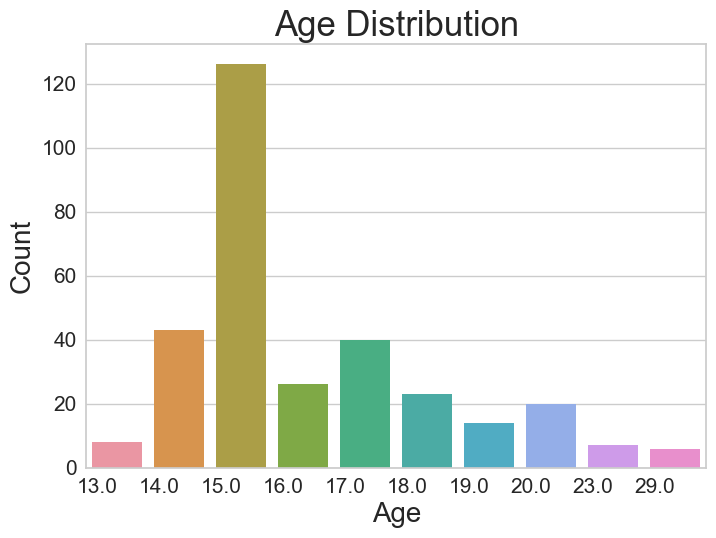

In [42]:
p = sns.countplot(x='Age', data=df)
p.set_xticklabels(p.get_xticklabels(), horizontalalignment='right')
plt.title("Age Distribution", size=25)
plt.xlabel("Age", size=20)
plt.ylabel("Count", size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("visualizations/age_distribution.png",bbox_inches='tight')
plt.show()

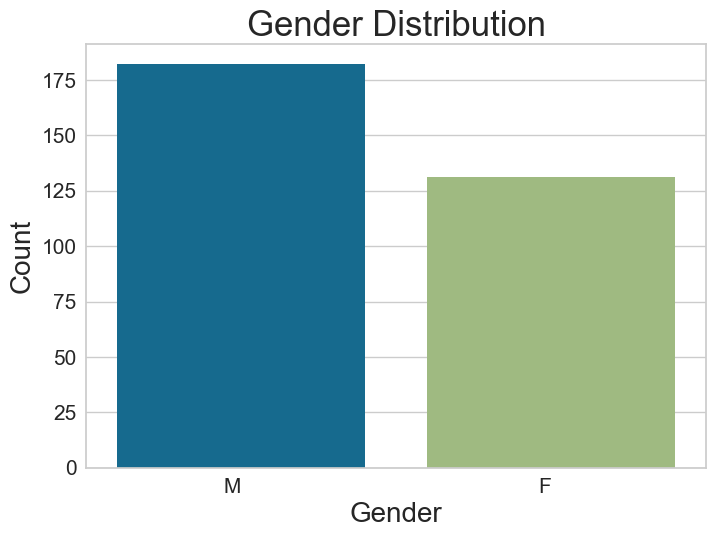

In [43]:
p = sns.countplot(x='Gender', data=df)
p.set_xticklabels(p.get_xticklabels(), horizontalalignment='right')
plt.title("Gender Distribution", size=25)
plt.xlabel("Gender", size=20)
plt.ylabel("Count", size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("visualizations/gender_distribution.png",bbox_inches='tight')
plt.show()

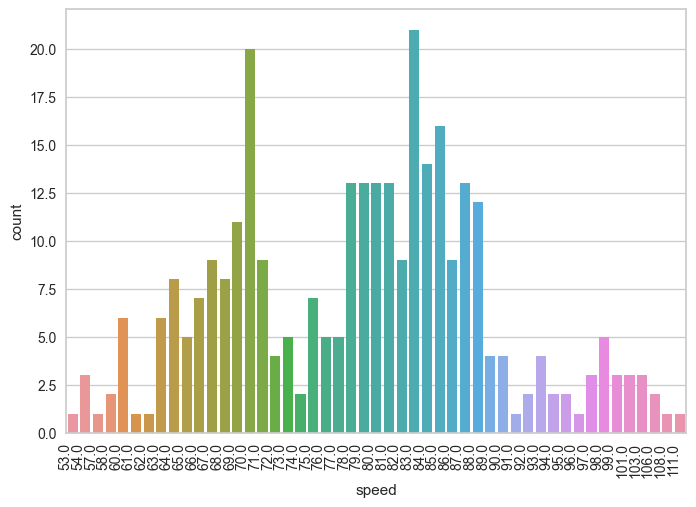

In [44]:
p = sns.countplot(x='speed', data=df)
p.set_xticklabels(p.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [45]:
df = df.drop(df[df.speed == -1].index)
df.head()

,key,speed,Pelvis_acc_0mean,Pelvis_acc_0std,Pelvis_acc_1mean,Pelvis_acc_1std,Pelvis_acc_2mean,Pelvis_acc_2std,Pelvis_angular_acc_0mean,Pelvis_angular_acc_0std,Pelvis_angular_acc_1mean,Pelvis_angular_acc_1std,Pelvis_angular_acc_2mean,Pelvis_angular_acc_2std,Pelvis_vel_0mean,Pelvis_vel_0std,Pelvis_vel_1mean,Pelvis_vel_1std,Pelvis_vel_2mean,Pelvis_vel_2std,Pelvis_angular_vel_0mean,Pelvis_angular_vel_0std,Pelvis_angular_vel_1mean,Pelvis_angular_vel_1std,Pelvis_angular_vel_2mean,Pelvis_angular_vel_2std,Pelvis_ori_0mean,Pelvis_ori_0std,Pelvis_ori_1mean,Pelvis_ori_1std,Pelvis_ori_2mean,Pelvis_ori_2std,Pelvis_ori_3mean,Pelvis_ori_3std,Pelvis_pos_0mean,Pelvis_pos_0std,Pelvis_pos_1mean,Pelvis_pos_1std,Pelvis_pos_2mean,Pelvis_pos_2std,L5_acc_0mean,L5_acc_0std,L5_acc_1mean,L5_acc_1std,L5_acc_2mean,L5_acc_2std,L5_angular_acc_0mean,L5_angular_acc_0std,L5_angular_acc_1mean,L5_angular_acc_1std,L5_angular_acc_2mean,L5_angular_acc_2std,L5_vel_0mean,L5_vel_0std,L5_vel_1mean,L5_vel_1std,L5_vel_2mean,L5_vel_2std,L5_angular_vel_0mean,L5_angular_vel_0std,L5_angular_vel_1mean,L5_angular_vel_1std,L5_angular_vel_2mean,L5_angular_vel_2std,L5_ori_0mean,L5_ori_0std,L5_ori_1mean,L5_ori_1std,L5_ori_2mean,L5_ori_2std,L5_ori_3mean,L5_ori_3std,L5_pos_0mean,L5_pos_0std,L5_pos_1mean,L5_pos_1std,L5_pos_2mean,L5_pos_2std,L3_acc_0mean,L3_acc_0std,L3_acc_1mean,L3_acc_1std,L3_acc_2mean,L3_acc_2std,L3_angular_acc_0mean,L3_angular_acc_0std,L3_angular_acc_1mean,L3_angular_acc_1std,L3_angular_acc_2mean,L3_angular_acc_2std,L3_vel_0mean,L3_vel_0std,L3_vel_1mean,L3_vel_1std,L3_vel_2mean,L3_vel_2std,L3_angular_vel_0mean,L3_angular_vel_0std,L3_angular_vel_1mean,L3_angular_vel_1std,L3_angular_vel_2mean,L3_angular_vel_2std,L3_ori_0mean,L3_ori_0std,L3_ori_1mean,L3_ori_1std,L3_ori_2mean,L3_ori_2std,L3_ori_3mean,L3_ori_3std,L3_pos_0mean,L3_pos_0std,L3_pos_1mean,L3_pos_1std,L3_pos_2mean,L3_pos_2std,T12_acc_0mean,T12_acc_0std,T12_acc_1mean,T12_acc_1std,T12_acc_2mean,T12_acc_2std,T12_angular_acc_0mean,T12_angular_acc_0std,T12_angular_acc_1mean,T12_angular_acc_1std,T12_angular_acc_2mean,T12_angular_acc_2std,T12_vel_0mean,T12_vel_0std,T12_vel_1mean,T12_vel_1std,T12_vel_2mean,T12_vel_2std,T12_angular_vel_0mean,T12_angular_vel_0std,T12_angular_vel_1mean,T12_angular_vel_1std,T12_angular_vel_2mean,T12_angular_vel_2std,T12_ori_0mean,T12_ori_0std,T12_ori_1mean,T12_ori_1std,T12_ori_2mean,T12_ori_2std,T12_ori_3mean,T12_ori_3std,T12_pos_0mean,T12_pos_0std,T12_pos_1mean,T12_pos_1std,T12_pos_2mean,T12_pos_2std,T8_acc_0mean,T8_acc_0std,T8_acc_1mean,T8_acc_1std,T8_acc_2mean,T8_acc_2std,T8_angular_acc_0mean,T8_angular_acc_0std,T8_angular_acc_1mean,T8_angular_acc_1std,T8_angular_acc_2mean,T8_angular_acc_2std,T8_vel_0mean,T8_vel_0std,T8_vel_1mean,T8_vel_1std,T8_vel_2mean,T8_vel_2std,T8_angular_vel_0mean,T8_angular_vel_0std,T8_angular_vel_1mean,T8_angular_vel_1std,T8_angular_vel_2mean,T8_angular_vel_2std,T8_ori_0mean,T8_ori_0std,T8_ori_1mean,T8_ori_1std,T8_ori_2mean,T8_ori_2std,T8_ori_3mean,T8_ori_3std,T8_pos_0mean,T8_pos_0std,T8_pos_1mean,T8_pos_1std,T8_pos_2mean,T8_pos_2std,Neck_acc_0mean,Neck_acc_0std,Neck_acc_1mean,Neck_acc_1std,Neck_acc_2mean,Neck_acc_2std,Neck_angular_acc_0mean,Neck_angular_acc_0std,Neck_angular_acc_1mean,Neck_angular_acc_1std,Neck_angular_acc_2mean,Neck_angular_acc_2std,Neck_vel_0mean,Neck_vel_0std,Neck_vel_1mean,Neck_vel_1std,Neck_vel_2mean,Neck_vel_2std,Neck_angular_vel_0mean,Neck_angular_vel_0std,Neck_angular_vel_1mean,Neck_angular_vel_1std,Neck_angular_vel_2mean,Neck_angular_vel_2std,Neck_ori_0mean,Neck_ori_0std,Neck_ori_1mean,Neck_ori_1std,Neck_ori_2mean,Neck_ori_2std,Neck_ori_3mean,Neck_ori_3std,Neck_pos_0mean,Neck_pos_0std,Neck_pos_1mean,Neck_pos_1std,Neck_pos_2mean,Neck_pos_2std,Head_acc_0mean,Head_acc_0std,Head_acc_1mean,Head_acc_1std,Head_acc_2mean,Head_acc_2std,Head_angular_acc_0mean,Head_angular_acc_0std,Head_angular_acc_1mean,Head_angular_acc_1std,Head_angular_acc_2mean,Head_angular_acc_2std,Head_vel_0mean,Head_vel_0std,Head_vel_1mean,Head_vel_1std,Head_vel_2mean,He

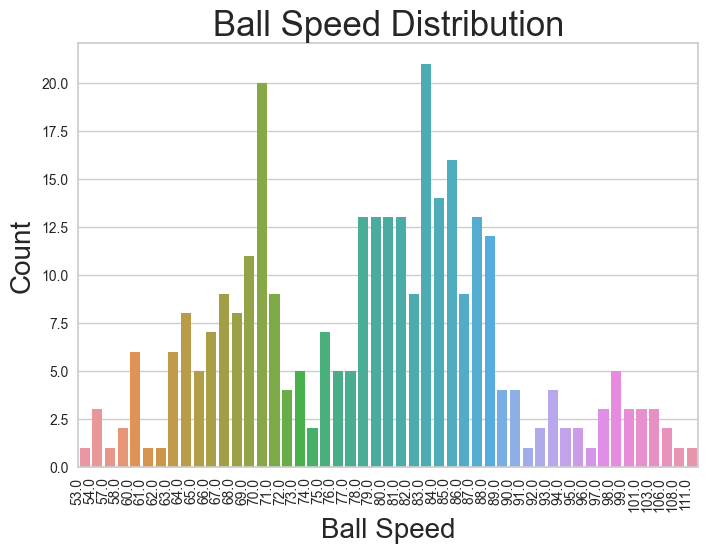

In [46]:
p = sns.countplot(x='speed', data=df)
p.set_xticklabels(p.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Ball Speed Distribution", size=25)
plt.xlabel("Ball Speed", size=20)
plt.ylabel("Count", size=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("visualizations/bar-plot-speed.png",bbox_inches='tight')
plt.show()

In [47]:
print(df.columns.tolist())

['key', 'speed', 'Pelvis_acc_0mean', 'Pelvis_acc_0std', 'Pelvis_acc_1mean', 'Pelvis_acc_1std', 'Pelvis_acc_2mean', 'Pelvis_acc_2std', 'Pelvis_angular_acc_0mean', 'Pelvis_angular_acc_0std', 'Pelvis_angular_acc_1mean', 'Pelvis_angular_acc_1std', 'Pelvis_angular_acc_2mean', 'Pelvis_angular_acc_2std', 'Pelvis_vel_0mean', 'Pelvis_vel_0std', 'Pelvis_vel_1mean', 'Pelvis_vel_1std', 'Pelvis_vel_2mean', 'Pelvis_vel_2std', 'Pelvis_angular_vel_0mean', 'Pelvis_angular_vel_0std', 'Pelvis_angular_vel_1mean', 'Pelvis_angular_vel_1std', 'Pelvis_angular_vel_2mean', 'Pelvis_angular_vel_2std', 'Pelvis_ori_0mean', 'Pelvis_ori_0std', 'Pelvis_ori_1mean', 'Pelvis_ori_1std', 'Pelvis_ori_2mean', 'Pelvis_ori_2std', 'Pelvis_ori_3mean', 'Pelvis_ori_3std', 'Pelvis_pos_0mean', 'Pelvis_pos_0std', 'Pelvis_pos_1mean', 'Pelvis_pos_1std', 'Pelvis_pos_2mean', 'Pelvis_pos_2std', 'L5_acc_0mean', 'L5_acc_0std', 'L5_acc_1mean', 'L5_acc_1std', 'L5_acc_2mean', 'L5_acc_2std', 'L5_angular_acc_0mean', 'L5_angular_acc_0std', 'L5_an